In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ipywidgets import interact, FloatSlider, IntSlider

# Working with Probability Distributions

Most common probability distributions are contained in the `scipy stats` module.

## The Binomial Distribution

For example, if you want to work with the binomial distribution, you can use:

In [2]:
from scipy.stats import binom

For calculating probabilties of a specific number of successes, you can use the `pmf` function. Note that pmf stands for "probability mass function".

To use this, you need to specify the following arguments:
* k: desired number of successes
* n: total number of trials
* p: probability of success

**Example:** If we flip a fair coin (probability of heads = 0.5) 10 times, what is the probability of it landing on heads exactly 7 times?

k =

n =   

p =   

In [3]:
binom.pmf(k = 7, n = 10, p = 0.5)

0.11718750000000014

<img style="float: left;" src="images/binom_normal/02.png" width="600">

**Example:** If we have a bent coin where the probability of heads is 0.7 which we flip ten times, what is the probability of it landing on heads exactly 7 times?

k =

n =

p = 

In [4]:
# Your code here.

**Question:** If we flip a coin ten times, what is the probability that it lands on heads either 6 or 7 times?

In [4]:
# Fill this in

<img style="float: left;" src="images/binom_normal/03.png" width="600">

**Question:** If we flip a coin ten times, what is the probability that it lands on heads either 7 or fewer times?

<img style="float: left;" src="images/binom_normal/04.png" width="600">

If you want to find the probability of $x$ _or fewer_ successes you can - rather than using the probability mass function - use the **cumulative distribution fuction**, or **cdf**. 

For a random variable X, the cdf is defined as

$$F(x) := P(X \leq x) = \text{the probability that value of the random variable is } x \text{ or less}$$

<img style="float: left;" src="images/binom_normal/05.png" width="600">

<img style="float: left;" src="images/binom_normal/06.png" width="600">

You can compute this value using the `.cdf` function:

In [6]:
binom.cdf(k = 7, n = 10, p = 0.5)

0.9453125

<img style="float: left;" src="images/binom_normal/07.png" width="600">

<img style="float: left;" src="images/binom_normal/08.png" width="800">

In [7]:
binom.cdf(k = 6, n = 10, p = 0.5) - binom.cdf(k = 3, n = 10, p = 0.5)

0.65625

<img style="float: left;" src="images/binom_normal/09.png" width="600">

<img style="float: left;" src="images/binom_normal/10.png" width="800">

In [8]:
1 - binom.cdf(k = 4, n = 10, p = 0.5)

0.6230468749999999

## Mean/Expected Value of a Random Variable

Similar to data sets, random variables have a mean. For random variables, the mean is also called the **expected value**.

Loosely speaking, if we simulated outcomes from our random variable a large number of times, the mean outcome would equal the mean of the random variable.

More formally, if $X$ is a discrete random variable with pmf $f(x)$, then the expected value of $X$ is given by 

$$E[X] = \sum_{x} x \cdot f(x)$$

where the sum runs over all possible outcomes.

The `binom` distribution we imported earlier will let us simulate a binomial random variable using the `.rvs` method.

To do it once, we specify the number of trials (n) and the probability of success (p).

In [9]:
binom.rvs(n = 10, p = 0.4)

2

We can also generate a multiple simulations by increasing the `size` argument.

In [11]:
binom.rvs(n = 10, p = 0.4, size = 20)

array([2, 4, 3, 4, 7, 8, 7, 2, 2, 2, 6, 6, 5, 3, 4, 3, 4, 6, 6, 3])

**Question:** Simulate a large number of outcomes from a binomial random variable with $n = 10$ and $p = 0.4$. What is the mean value of these outcomes?

In [17]:
# Your code here

**Question:** Now, change the values of $n$ and $p$ in whatever way you like. How does this change the average outcome?

Do you have a guess as far as how to calculate the expected value of binomial random variable with $n$ trials and probability of success $p$?

In [18]:
# Your code here

## Variance and Standard Deviation of a Random Variable

A random variable also has a variance and standard deviation. 

Loosely speaking, if we simulated outcomes from our random variable a large number of times, the variance and standard deviation of the outcomes would equal the variance and standard deviation of that variable, respectively.

In [42]:
(binom.rvs(n = 10, p = 0.5, size = 100000)).var()

2.5114246991

**Question:** What do you think the relationship between the probability of success, $p$, and the variance is? Experiment to test your guess by keeping $n$ fixed but varying $p$.

In [14]:
# Your Code Here

In [26]:
probs = np.linspace(start = 0, stop = 1, num = 100)   # Get 100 evenly-spaced numbers between 0 and 1
var = [(binom.rvs(n = 10, p = p, size = 100000)).var() for p in probs]             # Approximate the variance for each values of p

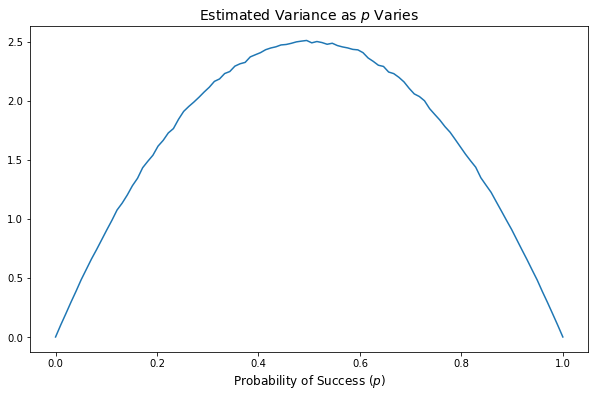

In [27]:
plt.figure(figsize = (10,6))
plt.plot(p, var)
plt.title('Estimated Variance as $p$ Varies', fontsize = 14)
plt.xlabel('Probability of Success ($p$)', fontsize = 12);

**Question:** What does this plot tell us?

## The Normal Distribution

If you are going to work with normal distributions, import `norm` from `scipy.stats`.

In [29]:
from scipy.stats import norm

The following interactive widget demonstrates how the two parameters, $\mu$ and $\sigma$ affect the shape and location of a normal distribution.

In [18]:
@interact(mu = FloatSlider(value = 0, min = -3, max = 3, step = 0.1),
         sigma = FloatSlider(value = 1, min = 0.1, max = 3, step = 0.1))
def normal_pdf(mu, sigma):
    x = np.arange(start = -4, stop = 4, step = 0.01)
    plt.figure(figsize = (10,6))
    plt.plot(x, norm.pdf(x, loc = mu, scale = sigma), color = 'black')
    plt.fill_between(x, norm.pdf(x, loc = mu, scale = sigma), color = 'cornflowerblue')
    plt.hlines(y = 0, xmin = -4, xmax = 4, color = 'black')
    plt.ylabel('Density')
    plt.title('Normal Distribution\n $\mu$ = {}, $\sigma$= {}'.format(mu, sigma))
    plt.xlim(-4, 4);

interactive(children=(FloatSlider(value=0.0, description='mu', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

For calculating probabilities with the normal distribution, you will usually need to use its cdf.

**Example:** For a random variable which is normally distributed with a mean of 100 and standard deviation of 10, what is the probability that the variable is less than 80?

Recall that the cdf tells the probability that the random variable is $x$ or less.

When using the `cdf` or `pdf` for a normal distribution, you need to specify the value(s) of $x$ along with
* loc: the mean
* scale: the standard deviation

In [19]:
norm.cdf(x = 80, loc = 100, scale = 10)

0.022750131948179195

<img style="float: left;" src="images/binom_normal/11.png" width="600">

**Example:** For a random variable which is normally distributed with a mean of 100 and standard deviation of 10, what is the probability that the variable is more than 85 but less than 115?

To answer this, you need to do the trick with subtracting two areas. Remember that the cdf only tells the probability of a particular value or less.

In [20]:
norm.cdf(x = 115, loc = 100, scale = 10) - norm.cdf(x = 85, loc = 100, scale = 10)

0.8663855974622838

<img style="float: left;" src="images/binom_normal/12.png" width="600">

**Example:** For a random variable which is normally distributed with a mean of 100 and standard deviation of 10, what is the probability that the variable is more than 90?

Again, you will need to do the subtraction trick.

In [21]:
1 - norm.cdf(x = 90, loc = 100, scale = 10)

0.8413447460685429

<img style="float: left;" src="images/binom_normal/13.png" width="600">

### Using the Normal Distribution to Estimate Probabilities

The dataset NHANES_heights_weights.csv contains a sample of participants in the National Health and Nutrition Examination Survey. Specifically, it contains the heights and weights of all male participants between the ages of 30 and 40.

In [43]:
nhanes = pd.read_csv('../data/NHANES_heights_weights.csv')

In [44]:
nhanes.head()

,SEQN,weight_kg,height_cm,age,gender
0,83856.0,89.1,181.5,30.0,male
1,83863.0,95.8,175.6,35.0,male
2,83910.0,73.2,178.9,37.0,male
3,83931.0,78.7,174.0,37.0,male
4,84011.0,119.6,178.2,32.0,male


You can get a quick glimpse at the characteristics of the dataset using the `.describe()` method.

In [46]:
nhanes['height_cm'].describe()

count    446.000000
mean     174.223767
std        7.770183
min      149.600000
25%      169.300000
50%      174.500000
75%      179.300000
max      193.800000
Name: height_cm, dtype: float64

To get a better idea of the distribution of values, we can look at a histogram.

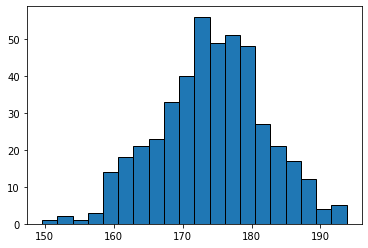

In [49]:
plt.hist(nhanes['height_cm'], bins = 20, edgecolor = 'black');

You can see that the data is roughly bell-shaped. There are some statistical tests which can be used to check whether a sample appears to have come from a normal distribution. 

Another option is to use what's called a **quantile-quantile plot**, or **Q-Q plot**. This type of plot can be used to assess whether it is plausible that a set of observations came from a particular distribution.

Specifically, a Q-Q plot is a scatterplot which shows the theoretical quantiles from the candidate distribution against the observed quantiles from the sample. If the plot is close to the identity plot (the diagonal line), then we can conclude that it is plausible (but not certain) that the sample came from that distribution. 

When looking at a Q-Q plot to evalate whether it is plausible to estimate a distribution using a normal distribution, the quantiles for a normal distribution with the same mean and standard deviation as the dataset are calculated.

You will use the following function to create our Q-Q plots. You just need to pass in the column of interest.

In [50]:
from nssstats.plots import qq_plot

/home/michael/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


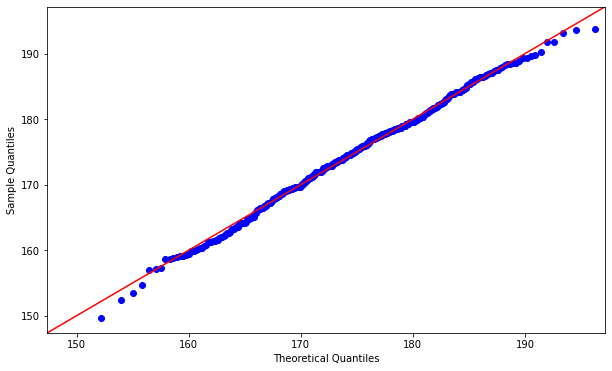

In [51]:
fig, ax = plt.subplots(figsize = (10,6))
qq_plot(nhanes['height_cm'], ax = ax)

You can see that, with just a few exceptions, the sample data hugs the diagonal line. You are probably safe to model the overall distribution using a normal distribution.

You can approximate the population distribution using a normal distribution with the same mean and standard deviation as the sample.

In [52]:
mu = np.mean(nhanes['height_cm'])
sigma = np.std(nhanes['height_cm'])

print('mu = {}'.format(mu))
print('sigma = {}'.format(sigma))

mu = 174.22376681614358
sigma = 7.7614674413081355


Let's take a look at the hypothetical normal distribution against the sample data.

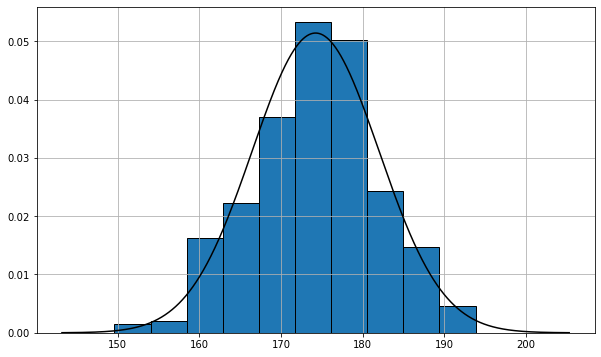

In [55]:
plt.figure(figsize = (10,6))
x = np.arange(start = -4 * sigma + mu, stop = 4 * sigma + mu, step = 0.01)  # Generate a set of x-values
y = norm.pdf(x, loc = mu, scale = sigma)                                    # Get the corresponding normal pdf values
plt.plot(x, y, color = 'black')      
nhanes['height_cm'].hist(density = True, edgecolor = 'black');

You can see that it's not a perfect fit, but is reasonably close.

Using this distribution, you can make predictions about the overall population.

Approximately what proportion of 30 - 40 year-old males will be under 5 feet tall (152.4 cm)?

In [ ]:
# Your Code Here

Approximately what proportion of 30 - 40 year-old males will be over 6 feet tall (182.88 cm)?

In [41]:
# Your Code Here

Approximately what proportion of 30 - 40 year-old males will be over 7 feet tall (213.36 cm)?

In [42]:
# Your Code Here